In [1]:
import matplotlib.pyplot as plt
from sim_helpers import sim_repeated, get_base_args, get_base_chain_args, get_title

## Base Spreading Rate

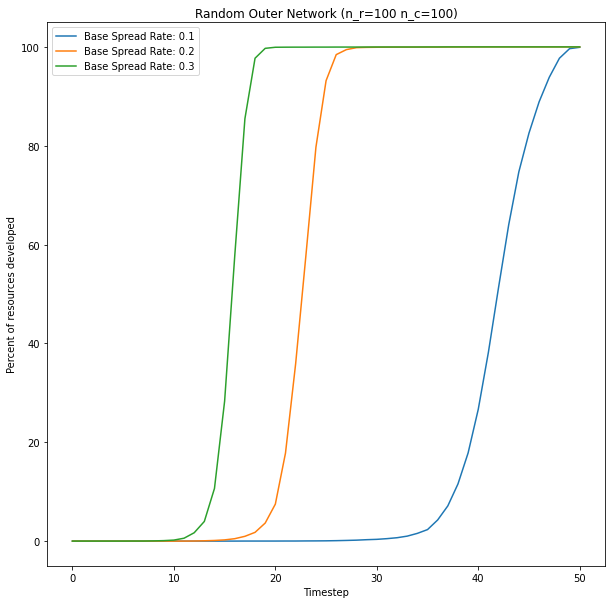

In [2]:
args = get_base_args()
plt.figure(figsize=(10, 10))

for base_spread_p in [.1, .2, .3]:
    args["base_spread_p"] = base_spread_p
    resources = sim_repeated(args, num_timesteps=50)
    plt.plot(resources, label='Base Spread Rate: ' + str(base_spread_p))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title(get_title(args))
plt.savefig('Figures/base_spread.png', dpi=300)
plt.show()

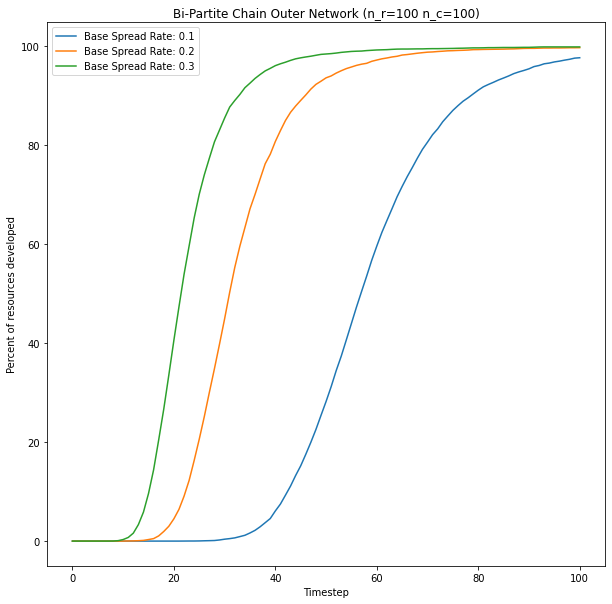

In [4]:
args = get_base_chain_args()
plt.figure(figsize=(10, 10))

for base_spread_p in [.1, .2, .3]:
    args["base_spread_p"] = base_spread_p
    resources = sim_repeated(args, num_timesteps=100)
    plt.plot(resources, label='Base Spread Rate: ' + str(base_spread_p))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title(get_title(args))
plt.savefig('Figures/base_chain_spread.png', dpi=300)
plt.show()

## Network density

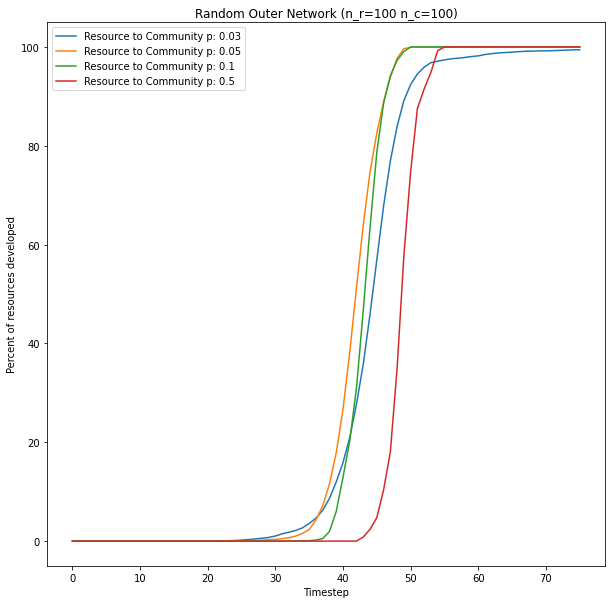

In [5]:
args = get_base_args()
plt.figure(figsize=(10, 10))

for comm_to_resource_p in [.03, .05, .1, .5]:
    args["outer_G_args"]['comm_to_resource_p'] = comm_to_resource_p
    resources = sim_repeated(args, num_timesteps=75)
        
    label = 'Resource to Community p: ' + str(comm_to_resource_p)
    plt.plot(resources, label=label)

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title(get_title(args))
plt.savefig('Figures/random_density.png', dpi=300)
plt.show()

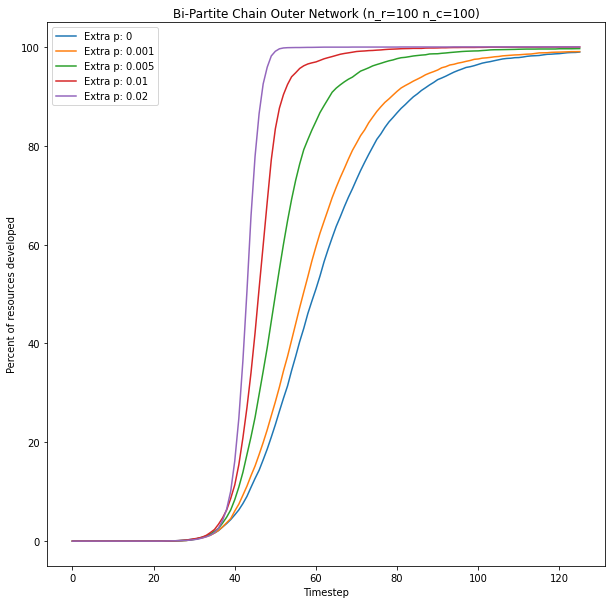

In [6]:
args = get_base_chain_args()
plt.figure(figsize=(10, 10))

for p in [0, .001, .005, .01, .02]:
    args["outer_G_args"]['p_extra'] = p
    resources = sim_repeated(args, num_timesteps=125)
    
    label = 'Extra p: ' + str(p)
    plt.plot(resources, label=label)
    
plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title(get_title(args))
plt.savefig('Figures/chain_extra_density.png', dpi=300)
plt.show()

## More communities to bi-partite chain

In [ ]:
args = get_base_chain_args()
plt.figure(figsize=(10, 10))

for n in [50, 100, 125, 200]:
    args["outer_G_args"]['n_communities'] = n
    resources = sim_repeated(args, num_timesteps=150)
    
    label = 'Num. communities ' + str(n)
    plt.plot(resources, label=label)
    
plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title('Bi-Partite Chain Outer Network (n_r=100)')
plt.savefig('Figures/extra_communities.png', dpi=300)
plt.show()

## Outside influence + Dist Scale

In [ ]:
args = get_base_chain_args()
plt.figure(figsize=(10, 10))

for outside_influence_k in [0, .15, .3, 1]:
        
    args["outside_influence_k"] = outside_influence_k
    resources = sim_repeated(args, num_timesteps=150)
        
    label = 'Outside Influence: ' + str(outside_influence_k)
    plt.plot(resources, label=label)

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title(get_title(args))
plt.savefig('Figures/outside_influence.png', dpi=300)
plt.show()

In [ ]:
args = get_base_chain_args()
plt.figure(figsize=(10, 10))

# Fix at 1
args["outside_influence_k"] = 1

for dist_scale in [0, 2, 4, 8]:
    
    args['dist_scale'] = dist_scale
    resources = sim_repeated(args, num_timesteps=100)
        
    label = 'Dist Scale: ' + str(dist_scale)
    plt.plot(resources, label=label)

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title(get_title(args) + ' Outside Influence = 1')
plt.savefig('Figures/dist_scale.png', dpi=300)
plt.show()

## Already Developed

In [ ]:
args = get_base_chain_args()
plt.figure(figsize=(10, 10))

for already_developed_p in [0, .1, .3]:
    args["already_developed_p"] = already_developed_p
    resources = sim_repeated(args, num_timesteps=100)
    
    label = 'Percent of already developed resources: ' + str(already_developed_p)
    plt.plot(resources, label=label)

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title(get_title(args))
plt.savefig('Figures/starting_development.png', dpi=300)
plt.show()

In [ ]:
args = get_base_chain_args()
fig, axes = plt.subplots(3, 3, figsize=(20,20))

for j, already_developed_p in enumerate([0, .1, .3]):
    for i, p in enumerate([.001, .01, .02]):
        
        args["already_developed_p"] = already_developed_p
        args["outer_G_args"]['p_extra'] = p
        
        resources = sim_repeated(args, num_timesteps=100)
        axes[i, j].plot(resources)
        
        title = 'Start % Developed: = ' + str(already_developed_p) + ', Extra p = ' + str(p)
        axes[i, j].set_title(title)

plt.title(get_title(args))
plt.savefig('Figures/starting_development_with_density.png', dpi=200)

In [ ]:
args = get_base_chain_args()
fig, axes = plt.subplots(3, 3, figsize=(20,20))

for j, already_developed_p in enumerate([0, .1, .3]):
    for i, k in enumerate([.15, .3, 1]):
        
        args["already_developed_p"] = already_developed_p
        args["outside_influence_k"] = k
        
        resources = sim_repeated(args, num_timesteps=100)
        axes[i, j].plot(resources)
        
        title = 'Outside influence: = ' + str(k) + ', Extra p = ' + str(p)
        axes[i, j].set_title(title)

plt.title(get_title(args))
plt.savefig('Figures/starting_development_with_outside_influence.png', dpi=200)

## Vote timescale

In [ ]:
args = get_base_chain_args()
plt.figure(figsize=(10, 10))

for vote_every in [1, 5, 10]:
    args["vote_every"] = vote_every
    resources = sim_repeated(args, num_timesteps=150)
    plt.plot(resources, label='Vote Every: ' + str(vote_every))

plt.ylabel('Percent of resources developed')
plt.xlabel('Timestep')
plt.legend()
plt.title(get_title(args))
plt.savefig('Figures/vote_every.png', dpi=300)
plt.show()